<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/04-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4: Data Wrangling

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”. 

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1. 

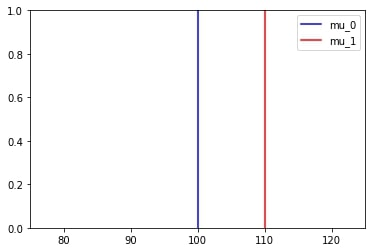

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability. 

When we plot the **variability and the mean**, we observe the following plot:

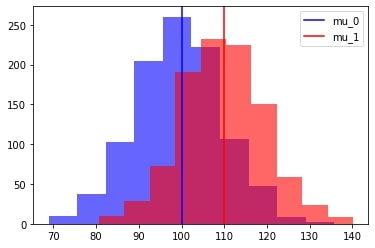

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0. 

Now suppose we observe the following plot:

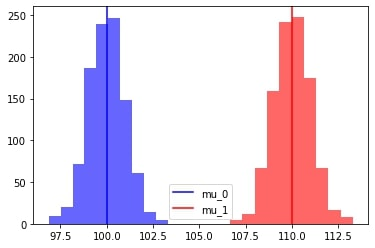

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [687]:
# Download the data located at the following URLs
cfb16_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv"
cfb17_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv"
cfb18_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv"
cfb19_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv"
cfb20_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [688]:
# Write your code to read in the files and add the year values from each csv:
import pandas as pd
cfb16 = pd.read_csv("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb16.csv")
cfb17 = pd.read_csv("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb17.csv")
cfb18 = pd.read_csv("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb18.csv")
cfb19 = pd.read_csv("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb19.csv")
cfb20 = pd.read_csv("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb20.csv")
cfb16.insert(0,"Year",2016)
cfb17.insert(0,"Year", 2017)
cfb18.insert(0,"Year",2018)
cfb19.insert(0,"Year",2019)
cfb20.insert(0,"Year",2020)



## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [689]:
# Write your code to combine all of the csvs into one dataframe here:
combined_df = pd.concat([cfb16,cfb17,cfb18,cfb19,cfb20],axis=0)
combined_df


,Year,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,...,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,2016,Akron (MAC),12,5,7,84,776,4649,5.99,38,...,25:58,114,6,8,14,8,14,22,-8,-0.67
1,2016,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,...,30:55,17,13,16,29,10,9,19,10,0.67
2,2016,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,...,33:35,18,1,20,21,5,8,13,8,0.62
3,2016,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,...,25:50,112,6,8,14,9,12,21,-7,-0.58
4,2016,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,...,30:11,93,8,9,17,7,14,21,-4,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,...,32:38,42,2,10,12,6,3,9,3,0.33
123,2020,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,...,29:23,83,4,5,9,10,2,12,-3,-0.27
124,2020,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,...,28:15,98,1,2,3,4,2,6,-3,-0.50
125,2020,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,...,36:45,98,4,4,8,5,6,11,-3,-0.50


## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example: 

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [690]:
# Write your code to parse the conference from the team name:
import re
combined_df.insert(2,"Conference",combined_df["Team"].str.extract(r'\((.*?)\)'))
#combined_df["Conference"] = combined_df["Team"].str.extract(r'\((.*?)\)')
combined_df


,Year,Team,Conference,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,...,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,2016,Akron (MAC),MAC,12,5,7,84,776,4649,5.99,...,25:58,114,6,8,14,8,14,22,-8,-0.67
1,2016,Alabama (SEC),SEC,15,14,1,34,1056,6829,6.47,...,30:55,17,13,16,29,10,9,19,10,0.67
2,2016,Appalachian St. (Sun Belt),Sun Belt,13,10,3,52,912,5589,6.13,...,33:35,18,1,20,21,5,8,13,8,0.62
3,2016,Arizona (Pac-12),Pac-12,12,3,9,67,815,4957,6.08,...,25:50,112,6,8,14,9,12,21,-7,-0.58
4,2016,Arizona St. (Pac-12),Pac-12,12,5,7,81,900,4689,5.21,...,30:11,93,8,9,17,7,14,21,-4,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020,West Virginia (Big 12),Big 12,9,5,4,42,690,3804,5.51,...,32:38,42,2,10,12,6,3,9,3,0.33
123,2020,Western Ky. (C-USA),C-USA,11,5,6,120,699,3200,4.58,...,29:23,83,4,5,9,10,2,12,-3,-0.27
124,2020,Western Mich. (MAC),MAC,6,4,2,15,392,2878,7.34,...,28:15,98,1,2,3,4,2,6,-3,-0.50
125,2020,Wisconsin (Big Ten),Big Ten,6,3,3,93,431,2153,5.00,...,36:45,98,4,4,8,5,6,11,-3,-0.50


## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions. 

- Do the same as above for `Off.TDs`.

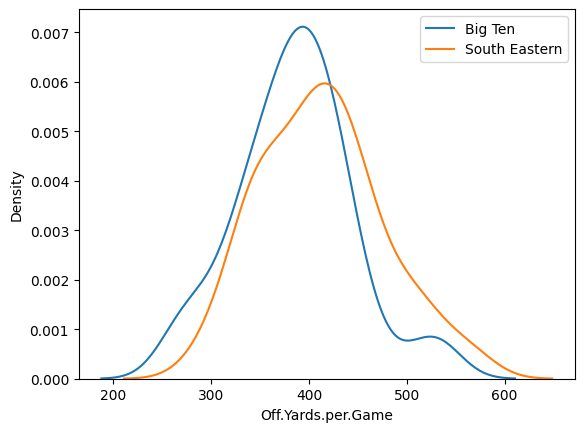

In [691]:
# Write the code for the statistical differences for Off.Yards.per.Game:
from matplotlib import pyplot as plt
import seaborn as sns
big_ten_df = combined_df[combined_df["Conference"] == "Big Ten"]
south_eastern_df = combined_df[combined_df["Conference"] == "SEC"]
sns.kdeplot(big_ten_df,x="Off.Yards.per.Game",label="Big Ten")
sns.kdeplot(south_eastern_df,x="Off.Yards.per.Game",label="South Eastern")
plt.legend()



(Comment on the difference in means and the overlap of distributions here)



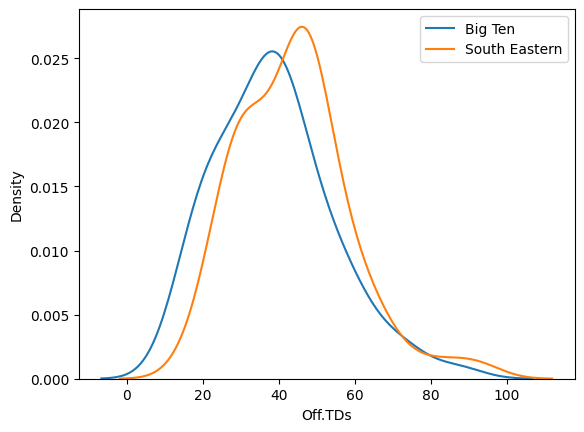

In [692]:
# Write the code for the statistical differences for Off.TDs:
import seaborn as sns
big_ten_df = combined_df[combined_df["Conference"] == "Big Ten"]
south_eastern_df = combined_df[combined_df["Conference"] == "SEC"]
south_eastern_df
sns.kdeplot(big_ten_df,x="Off.TDs",label="Big Ten")
sns.kdeplot(south_eastern_df,x="Off.TDs",label="South Eastern")
plt.legend()

(Comment on the difference in means and the overlap of distributions here)

For off yards per game, big ten and South Eastern both have similar distrubutions and similar means.
For off TDs, while the shape of the distribution is similar for both conferences, South Eastern has a slightly larger mean, as it's offset further to the right on average than Big Ten. They both tend to overlap the same areas.



### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions. 

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`.



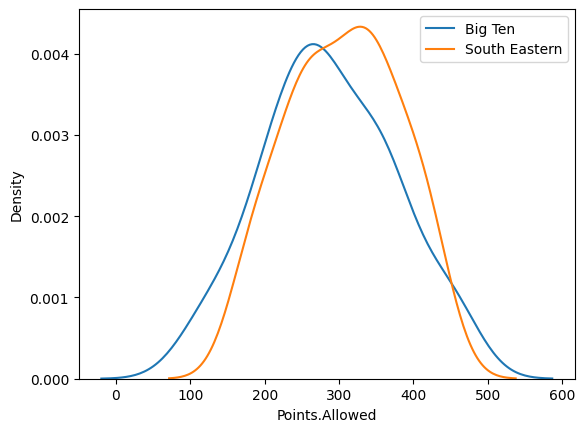

In [693]:
# Write the code for the statistical differences for Points.Allowed:
big_ten_df = combined_df[combined_df["Conference"] == "Big Ten"]
south_eastern_df = combined_df[combined_df["Conference"] == "SEC"]
south_eastern_df
sns.kdeplot(big_ten_df,x="Points.Allowed",label="Big Ten")
sns.kdeplot(south_eastern_df,x="Points.Allowed",label="South Eastern")
plt.legend()

(Comment on the difference in means and the overlap of distributions here)

Similar to Off TDs, while the shape of the distribution is similar for both conferences, South Eastern has a slightly larger mean, as it's offset further to the right on average than Big Ten. They both tend to overlap the same areas.

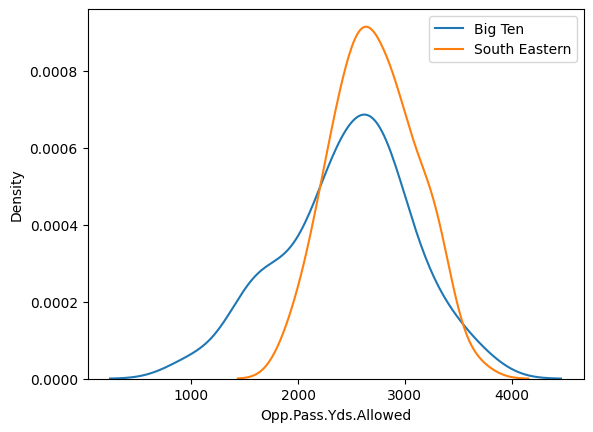

In [694]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:
big_ten_df = combined_df[combined_df["Conference"] == "Big Ten"]
south_eastern_df = combined_df[combined_df["Conference"] == "SEC"]
south_eastern_df
sns.kdeplot(big_ten_df,x="Opp.Pass.Yds.Allowed",label="Big Ten")
sns.kdeplot(south_eastern_df,x="Opp.Pass.Yds.Allowed",label="South Eastern")
plt.legend()

(Comment on the difference in means and the overlap of distributions here)

South Eastern and Big ten have less overlap here compared to the previous graphs, South Eastern's yards allowed tends to be clustered between 2,000 and 3,800, whereas Big Ten's are more spread out between 500 and 4,000. The graphs have some overlap between 2,000 and 3,700 yards. South Eastern's mean is larger than Big Ten's

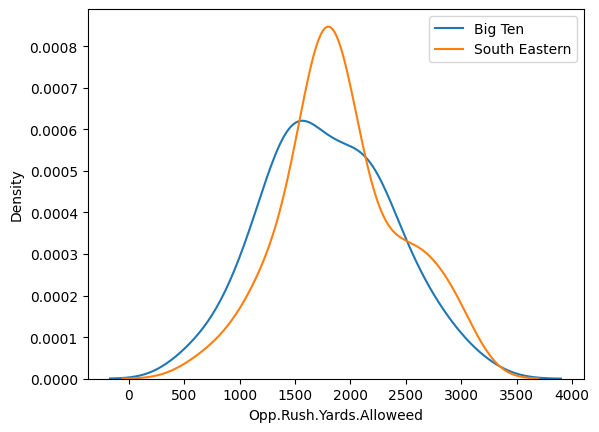

In [695]:
# Write the code for the statistical differences for Opp.Rush.Yards.Allowed:
big_ten_df = combined_df[combined_df["Conference"] == "Big Ten"]
south_eastern_df = combined_df[combined_df["Conference"] == "SEC"]
south_eastern_df
sns.kdeplot(big_ten_df,x="Opp.Rush.Yards.Alloweed",label="Big Ten")
sns.kdeplot(south_eastern_df,x="Opp.Rush.Yards.Alloweed",label="South Eastern")
plt.legend()

(Comment on the difference in means and the overlap of distributions here)

Big Ten and South Eastern overlap for most of the graph. South Eastern has a higher mean due to generally being a little further to the right on the graph at any given time, as well as having the spike above Big Ten between 1,500 and 2,000 Yards.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures. 

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

Average variance for Off Yards per game was: 6.075262329512314
Average variance of Off TDs per game was: 0.342982265728592


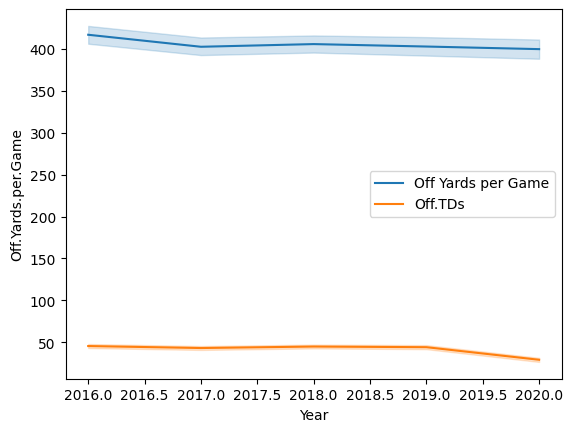

In [696]:
# Create a few plots showing how each metric changed over time:
#sb.kdeplot(cfb, x = "Off.Yards.per.Game", hue = "Years")
sns.lineplot(data=combined_df, x="Year",y="Off.Yards.per.Game",label="Off Yards per Game")
sns.lineplot(data=combined_df,x="Year",y="Off.TDs",label="Off.TDs")
plt.legend
OYPG_variance = combined_df["Off.Yards.per.Game"].var()/len(combined_df)
OTDs_variance = combined_df["Off.TDs"].var()/len(combined_df)
print(f"Average variance for Off Yards per game was: {OYPG_variance}")
print(f"Average variance of Off TDs per game was: {OTDs_variance}")
plt.show()



(Comment on any trends you see here)

While there was some change in the average number of yards per game or touchdowns, they haven't changed enough to be statistically significant, as some slight fluctuations over time are to be expected, and these aren't very extreme. Both graphs appear to slightly decrease between 2016 and 2020, but those trends are most likely spurious.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures. 

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

Average variance for Points Allowed was: 13.32426568450036
Average variance of Opp Pass Yards Allowed was: 606.868310637521
Average variance of Opp Rush Yards Allowed was: 534.1881543969829


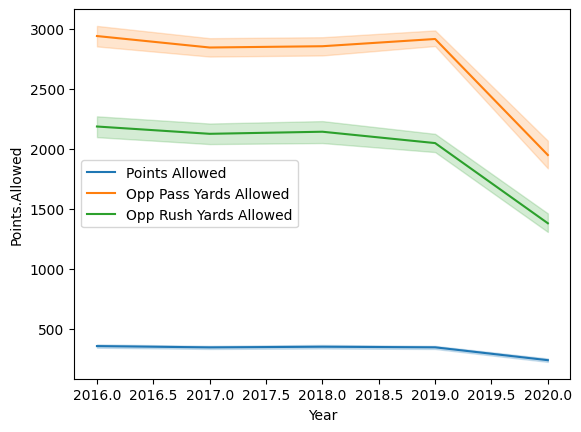

In [796]:
# Create a few plots showing how each metric changed over time:
sns.lineplot(data=combined_df, x="Year",y="Points.Allowed",label="Points Allowed")
sns.lineplot(data=combined_df, x="Year",y="Opp.Pass.Yds.Allowed",label="Opp Pass Yards Allowed")
sns.lineplot(data=combined_df,x="Year",y="Opp.Rush.Yards.Alloweed",label="Opp Rush Yards Allowed")
plt.legend
PAvariance = combined_df["Points.Allowed"].var()/len(combined_df)
OPYA_variance = combined_df["Opp.Pass.Yds.Allowed"].var()/len(combined_df)
ORYA_variance = combined_df["Opp.Rush.Yards.Alloweed"].var()/len(combined_df)
print(f"Average variance for Points Allowed was: {PAvariance}")
print(f"Average variance of Opp Pass Yards Allowed was: {OPYA_variance}")
print(f"Average variance of Opp Rush Yards Allowed was: {ORYA_variance}")
plt.show()

In [ ]:
# Create a few plots showing how each metric changed over time:


(Comment on any trends you see here)